Belfiore Asia, CID:02129867

MSc Advanced Computing, Spring Term, January 2025

# **Acute Kidney Injury (AKI) Neural Network Predictor**

In [6]:
import numpy as np  # add to requirements.txt
import torch    # add to requirements.txt
import torch.nn as nn
from utils import *
import matplotlib.pyplot as plt

# 0. Define Local Data Paths
train_data_path = 'data/training.csv'
test_data_path = 'data/test.csv'

# GPU availability check (MAC)
# if torch.backends.mps.is_available():
#     mps_device = torch.device("mps")
#     x = torch.ones(1, device=mps_device)
#     print (x)
# else:
#     print ("MPS device not found.")


def plot_accuracy(model, y_true, model_name, f3_score):
    fig, ax = plt.subplots()
    plt.hist(model, color='g', alpha=0.4, label='NHS')
    if y_true is not None:
        plt.hist(y_true, color='r', alpha=1, histtype='step', label='True Diagnosis')
    plt.title(f"Accuracy of {model_name} with F3 Score: {f3_score}")
    plt.xlabel(f'{model_name} Diagnosis')
    plt.ylabel('Number of Patients')
    plt.legend()

In [ ]:
# Define Model Architecture
class AkiPred(nn.Module):
    """
        AkiPred Model
        architecture:
            input layer  
            -> hidden layer 1 
            -> dropout layer 
            -> hidden layer 2 
            -> output layer
    """

    def __init__(self, input_size, hidden_size):
        """
            Define Model Architecture
            inputs: 
                input_size: number of features in the input data
                hidden_size: number of neurons in the hidden layers

        """
        super().__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size

        # input layer ()
        self.input_layer = nn.Linear(input_size, hidden_size)

        # (2) hidden layers ()
        self.hidden1 = nn.Linear(hidden_size, hidden_size)
        # dropout layer
        self.dropout = nn.Dropout(p=0.1)
        self.hidden2 = nn.Linear(hidden_size, hidden_size)

        # output layer ()
        self.output_layer = nn.Linear(hidden_size, 1) 

        # activation functions #
        # self.prelu = nn.PReLU(1)  # for hidden layers 
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()  # for output layer 

    # model forward pass
    def forward(self, x):
        """
            AkiPred model: 
            inputs: 
                x: number of features in the input data
        """
        # ReLU activation for input and hidden layers #
        x = self.relu(self.input_layer(x)) 
        x = self.relu(self.hidden1(x)) 
        x = self.dropout(x)   # dropout layer
        x = self.relu(self.hidden2(x)) 
        x = self.output_layer(x)
        x = self.sigmoid(x) # squash output between 0 and 1
        return x
    
    # def xavier_init(self, m):
    #     if type(m) == nn.Linear:
    #         torch.nn.init.xavier_uniform_(m.weight)


# Save Model after training is complete
def save_model(model):
    """
        Save AkiPred Model
        input: 
            model: AkiPred model
        output: -
    """
    model_path = 'aki_predictor/aki_predictor.pth'
    try:
        torch.save(model, model_path)
        print("Saved PyTorch Model State to", model_path)
    except:
        print("An error occurred.")


# Model Training Pipeline 
def train_model(model, train_data):
    """
        Pipeline to Train AkiPred Model
        input: 
            model: AkiPred model
            train_data: training data 
                        (age, sex, blood tests cretinine results, time elapsed between tests)
        output: -
    """
    # set epochs and batch size
    epochs_num = 100
    batch_size = 250
    model_train_loss = [] # save model loss for each epoch

    # set model parameters
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)  # Adam Optimizer
    model_loss = nn.MSELoss()  # Mean Squared Error Loss
    # model_loss = nn.BCELoss()  # Binary Cross Entropy Loss

    dataloader_train = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
    # train model 
    for epoch in range(epochs_num): 
        model.train()
        for i, (sample, x, y) in enumerate(dataloader_train):
            # inputs
            inputs = x
            # target outputs
            target = y.unsqueeze(1) # to match model output shape [batch_size, 1]

            # model outputs
            outputs = model(inputs) 
            loss = model_loss(outputs, target)  # compute loss

            # step + optimizer
            optimizer.zero_grad()  
            loss.backward()
            optimizer.step()

        model_train_loss.append(loss.item())
        
        if (epoch+1)%50 == 0:
            # Get the loss for every 50th epoch
            print(f'Epoch {epoch+1}/{epochs_num}: --> Loss = {loss.item()}')

    # save_model(model)


In [ ]:
# Model Training Pipeline 
def train_model(model, train_data):
    # set epochs and batch size
    epochs_num = 100
    batch_size = 250
    model_train_loss = [] # save model loss for each epoch

    # set model parameters
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)  # Adam Optimizer
    model_loss = nn.MSELoss()  # Mean Squared Error Loss
    # model_loss = nn.BCELoss()  # Binary Cross Entropy Loss

    dataloader_train = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
    # train model 
    for epoch in range(epochs_num): 
        model.train()
        for i, (sample, x, y) in enumerate(dataloader_train):
            # inputs
            inputs = x
            # target outputs
            target = y.unsqueeze(1) # to match model output shape [batch_size, 1]

            # model outputs
            outputs = model(inputs) 
            loss = model_loss(outputs, target)  # compute loss

            # step + optimizer
            optimizer.zero_grad()  
            loss.backward()
            optimizer.step()

        model_train_loss.append(loss.item())
        
        if (epoch+1)%50 == 0:
            # Get the loss for every 50th epoch
            print(f'Epoch {epoch+1}/{epochs_num}: --> Loss = {loss.item()}')

    # save_model(model)


In [28]:
from importlib import reload
import numpy as np 
import utils
reload(utils)

from utils import *

In [76]:
from importlib import reload
import numpy as np 
import utils
reload(utils)

from utils import *

# 1. Load Training and Testing Datasets
train_data = prepare_dataset('data/training.csv', 'train')
# test_data = prepare_dataset('data/test.csv', 'test')
train_data

,patient_features,aki_score
0,"[1, 18, 108.55, 102.56, 105.555, 1.05840483619...",0
1,"[0, 58, 116.03, 104.46, 130.16, 1.110760099559...",0
2,"[0, 39, 235.44, 174.31, 202.18, 1.350697034019...",0
3,"[1, 27, 115.39, 91.14, 115.39, 1.2660741716041...",0
4,"[0, 4, 67.83, 53.02, 71.41, 0.9498669654110069...",0
...,...,...
7296,"[1, 55, 151.55, 151.55, 151.55, 1.0, 0]",0
7297,"[1, 43, 133.05, 109.05, 130.885, 1.22008253094...",0
7298,"[1, 26, 173.68, 173.68, 173.68, 1.0, 0]",0
7299,"[1, 31, 152.99, 76.5, 114.745, 1.9998692810457...",1


In [ ]:
# 2. Train Model
input_size = 10
hidden_size = 64
model = AkiPred(input_size, hidden_size)
# model.apply(model.xavier_init)
print(model, "\nTotal samples:", len(train_data))

In [ ]:
# 3. Make Predictions on Validation Dataset
model_aki = model(input)

In [ ]:
# 4. Compute F3 Score
model_f3 = fbeta_score(train_data['aki_score'], model_aki, beta=3)

In [ ]:
# 4.b. Plot Model Accuracy
plot_accuracy(model_aki, train_data['aki_score'], 'Trained Model', model_f3)

In [77]:
# 5 Compare to NHS algorithm
# 5.a NHS Train Dataset Prediction 
nhs_aki = train_data['patient_features'].apply(lambda patient_record: nhs_aki_algo(patient_record))
nhs_f3 = fbeta_score(train_data['aki_score'], nhs_aki, beta=3)
(train_data['aki_score'] == nhs_aki).value_counts(), nhs_f3

(True     6754
 False     547
 Name: count, dtype: int64,
 0.9262711319663174)

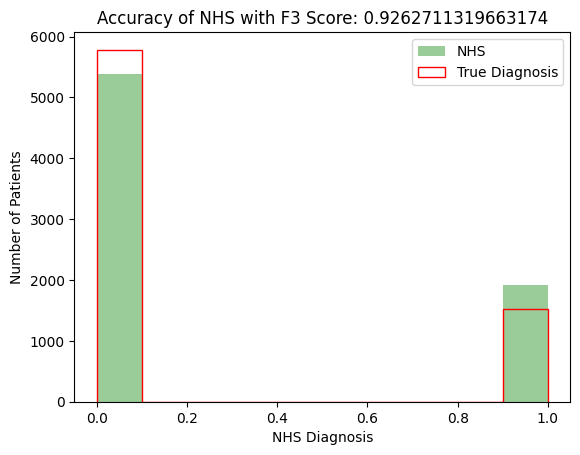

In [70]:
# 5.b Plot Train Prediction Accuracy
plot_accuracy(nhs_aki, train_data['aki_score'], 'NHS', nhs_f3)

In [58]:
# Test Dataset Prediction
test_data = prepare_dataset('data/test.csv', 'train')
# [sex, age, c1, rv1, rv2, rv_ratio, creatinine_change]
# test_data.rename(columns={'1': 'sex'}, inplace=True)
test_data

,patient_features,aki_score
0,"[0, 33, 106.91, 89.74, 104.345, 1.191330510363...",0
1,"[1, 23, 104.53, 47.49, 66.28, 2.20109496736155...",1
2,"[0, 55, 212.26, 200.91, 213.70499999999998, 0, 0]",0
3,"[0, 34, 167.2, 157.05, 172.62, 0.9686015525431...",0
4,"[1, 68, 160.33, 159.19, 174.805, 1.00716125384...",0
...,...,...
7397,"[1, 35, 95.48, 95.48, 111.68, 1.0, -32.3999999...",0
7398,"[0, 61, 109.99, 109.99, 109.99, 1.0, 0]",0
7399,"[0, 61, 97.03, 97.03, 104.055, 1.0, -14.049999...",0
7400,"[0, 1, 132.11, 132.11, 132.11, 1.0, 0]",0


In [63]:
# 5.d NHS Test Dataset Prediction 
nhs_test_aki = test_data['patient_features'].apply(lambda patient_record: nhs_aki_algo(patient_record))
nhs_f3 = fbeta_score(test_data['aki_score'], nhs_test_aki, beta=3)
nhs_f3

0.936411149825784

In [64]:
a=[0,1,2,3,4,5,6]
for n in a[::2]:
    print(n)

0
2
4
6


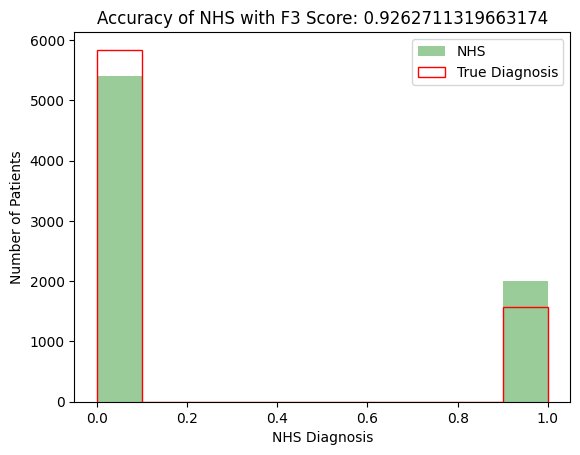

In [62]:
# 5.d Plot Test Prediction Accuracy
plot_accuracy(nhs_test_aki, test_data['aki_score'], 'NHS', nhs_f3)